In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant


In [2]:
# Read the data files
exchange_rate_data = pd.read_excel('NG Exchange rates.xlsx')
inflation_data = pd.read_excel('NG Export Inflation Rates.xlsx')
money_supply_data = pd.read_excel('NG M1 Money Supply.xlsx')
stock_market_data = pd.read_excel('NG Stock Market Index.xlsx')

In [3]:
# Display the first few rows of each dataframe to understand their structure
inflation_data.head(), money_supply_data.head(), stock_market_data.head(), exchange_rate_data.head()

(   Year  Month  All Items (Year on Change)  All Items (12 Months Avg. Change)  \
 0  2014      1                         8.0                                8.4   
 1  2014      2                         7.7                                8.3   
 2  2014      3                         7.8                                8.2   
 3  2014      4                         7.9                                8.1   
 4  2014      5                         8.0                                8.0   
 
    Food (Year on Change)/1  Food (12 Months Avg. Change)/1  \
 0                      9.3                             9.6   
 1                      9.2                             9.5   
 2                      9.3                             9.5   
 3                      9.4                             9.4   
 4                      9.7                             9.4   
 
    All Items Less Farm Produce (Year on Change)/2  \
 0                                             6.6   
 1                

In [4]:
# Display the first few rows of each dataframe to understand their structure
inflation_data.head(), money_supply_data.head(), stock_market_data.head(), exchange_rate_data.head()

(   Year  Month  All Items (Year on Change)  All Items (12 Months Avg. Change)  \
 0  2014      1                         8.0                                8.4   
 1  2014      2                         7.7                                8.3   
 2  2014      3                         7.8                                8.2   
 3  2014      4                         7.9                                8.1   
 4  2014      5                         8.0                                8.0   
 
    Food (Year on Change)/1  Food (12 Months Avg. Change)/1  \
 0                      9.3                             9.6   
 1                      9.2                             9.5   
 2                      9.3                             9.5   
 3                      9.4                             9.4   
 4                      9.7                             9.4   
 
    All Items Less Farm Produce (Year on Change)/2  \
 0                                             6.6   
 1                

In [5]:
#Drop columns not needed from our inflation dataset
inflation_data.drop(['All Items (12 Months Avg. Change)','Food (Year on Change)/1','Food (12 Months Avg. Change)/1','All Items Less Farm Produce (Year on Change)/2','All Items Less Farm Produce (12 Months Avg. Change)/2','All Items Less Farm Produce and Energy (Year on Change)/3','All Items Less Farm Produce and Energy (12 Months Avg. Change)/3'], axis=1, inplace=True)

In [6]:
#Check that the columns were dropped
inflation_data

,Year,Month,All Items (Year on Change)
0,2014,1,8.00
1,2014,2,7.70
2,2014,3,7.80
3,2014,4,7.90
4,2014,5,8.00
...,...,...,...
121,2024,2,31.70
122,2024,3,33.20
123,2024,4,33.69
124,2024,5,33.95


In [7]:
# Convert date columns to datetime format
stock_market_data['Date'] = pd.to_datetime(stock_market_data['Date'])
exchange_rate_data['Rate Date'] = pd.to_datetime(exchange_rate_data['Rate Date'])
inflation_data['Year'] = pd.to_datetime(inflation_data['Year'], format='%Y')
money_supply_data['Year'] = pd.to_datetime(money_supply_data['Year'], format='%Y')


In [8]:
# Display the first few rows of each dataframe to understand their structure
inflation_data.info(), money_supply_data.info(), stock_market_data.info(), exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Year                        126 non-null    datetime64[ns]
 1   Month                       126 non-null    int64         
 2   All Items (Year on Change)  126 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               125 non-null    datetime64[ns]
 1   Month              125 non-null    int64         
 2   Narrow Money (M1)  125 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entr

(None, None, None, None)

In [9]:
# Set the 'Date' column as the index for the stock market data
stock_market_data.set_index('Date', inplace=True)
stock_market_data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-07-22,100568.60,100539.40,100586.42,100506.84,335.68M,0.0003
2024-07-19,100539.40,100503.21,100539.79,100315.93,603.87M,0.0004
2024-07-18,100503.21,100031.36,100612.86,99830.80,392.73M,0.0047
2024-07-17,100032.32,100075.59,100277.80,99955.79,1.10B,-0.0004
2024-07-16,100075.59,99938.56,100077.30,99891.74,368.36M,0.0010
...,...,...,...,...,...,...
2014-01-08,41830.89,41806.73,42258.64,41666.08,NaN,0.0006
2014-01-07,41806.73,41507.30,41834.87,41240.51,NaN,0.0072
2014-01-06,41507.30,41450.48,41513.95,41240.18,NaN,0.0014


In [10]:
# Extract year and month from the 'Rate Date' column in exchange rate data
exchange_rate_data['Year'] = exchange_rate_data['Rate Date'].dt.year
exchange_rate_data['Month'] = exchange_rate_data['Rate Date'].dt.month
exchange_rate_data

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Year,Month
0,2024-07-22,US DOLLAR,2024,July,1533.5590,1534.0590,1534.5590,2024,7
1,2024-07-22,POUNDS STERLING,2024,July,1981.0515,1981.6974,1982.3433,2024,7
2,2024-07-22,EURO,2024,July,1668.8189,1669.3630,1669.9071,2024,7
3,2024-07-22,SWISS FRANC,2024,July,1724.2624,1724.8246,1725.3868,2024,7
4,2024-07-22,YEN,2024,July,9.7810,9.7842,9.7874,2024,7
...,...,...,...,...,...,...,...,...,...
30134,2014-02-01,WAUA,2014,January,237.4729,238.2405,239.0080,2014,2
30135,2014-02-01,YUAN/RENMINBI,2014,January,25.5655,25.6486,25.7317,2014,2
30136,2014-02-01,RIYAL,2014,January,41.2456,41.3789,41.5123,2014,2
30137,2014-02-01,DANISH KRONA,2014,January,28.3671,28.4588,28.5505,2014,2


In [11]:
# Melt the inflation data to have columns for each category
inflation_data = inflation_data.melt(id_vars=['Year', 'Month'], var_name='Category', value_name='Inflation Rate')
inflation_data['Inflation Rate'] = pd.to_numeric(inflation_data['Inflation Rate'])
inflation_data

,Year,Month,Category,Inflation Rate
0,2014-01-01,1,All Items (Year on Change),8.00
1,2014-01-01,2,All Items (Year on Change),7.70
2,2014-01-01,3,All Items (Year on Change),7.80
3,2014-01-01,4,All Items (Year on Change),7.90
4,2014-01-01,5,All Items (Year on Change),8.00
...,...,...,...,...
121,2024-01-01,2,All Items (Year on Change),31.70
122,2024-01-01,3,All Items (Year on Change),33.20
123,2024-01-01,4,All Items (Year on Change),33.69
124,2024-01-01,5,All Items (Year on Change),33.95


In [12]:
# Data Cleaning and Transformation
# Handle missing values, outliers, or inconsistencies in the data if necessary

# Create a combined dataset for analysis
#combined_data = pd.DataFrame()
#combined_data['Year-Month'] = pd.to_datetime(exchange_rate_data['Year'].astype(str) + '-' + exchange_rate_data['Month'].astype(str), format='%Y-%m')
#combined_data['Exchange Rate (USD)'] = exchange_rate_data[exchange_rate_data['Currency'] == 'US DOLLAR']
#combined_data['Inflation Rate'] = inflation_data['Inflation Rate']
#combined_data['Money Supply (Billions NGN)'] = money_supply_data['Narrow Money (M1)'] / 1000000000
#combined_data

In [13]:
exchange_rate_data = exchange_rate_data[exchange_rate_data['Currency'] == 'US DOLLAR']

In [14]:
exchange_rate_data.rename(columns={'Rate Date':'Date'}, inplace=True)

C:\Users\Henry Okam\AppData\Local\Temp\ipykernel_32332\3087328666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_rate_data.rename(columns={'Rate Date':'Date'}, inplace=True)


In [15]:
exchange_rate_data

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Year,Month
0,2024-07-22,US DOLLAR,2024,July,1533.559,1534.059,1534.559,2024,7
12,2024-07-19,US DOLLAR,2024,July,1584.000,1584.500,1585.000,2024,7
24,2024-07-17,US DOLLAR,2024,July,1583.739,1584.239,1584.739,2024,7
35,2024-07-16,US DOLLAR,2024,July,1572.492,1572.992,1573.492,2024,7
47,2024-07-15,US DOLLAR,2024,July,1565.392,1565.892,1566.392,2024,7
...,...,...,...,...,...,...,...,...,...
30084,2014-08-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,8
30095,2014-07-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,7
30106,2014-06-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,6
30117,2014-03-01,US DOLLAR,2014,January,154.700,155.200,155.700,2014,3


In [16]:
# Resample the stock market data to monthly frequency and calculate the percentage change
stock_market_monthly = stock_market_data.resample('M').last()
stock_market_monthly['Change %'] = stock_market_monthly['Change %'].ffill()
stock_market_monthly = stock_market_monthly.dropna()

stock_market_monthly

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-09-30,31217.77,30825.00,31217.77,30505.37,466.94M,0.0127
2016-08-31,27599.03,27493.12,27612.13,27487.20,262.61M,0.0039
2016-09-30,28335.40,28247.56,28335.40,27907.57,217.81M,0.0031
2016-10-31,27220.09,27294.21,27317.10,27215.56,219.90M,-0.0027
2016-11-30,25241.63,25233.42,25362.12,25198.36,414.13M,0.0003
...,...,...,...,...,...,...
2024-03-31,104562.06,104284.86,104607.60,104236.44,622.84M,0.0027
2024-04-30,98225.63,97896.15,98225.63,97896.15,552.20M,0.0027
2024-05-31,99300.62,99297.03,99385.03,99281.93,433.99M,0.0002


In [17]:
# Reset the index to move the date column back to a regular column
stock_market_monthly.reset_index(inplace=True)

# Convert the date column to datetime format
stock_market_monthly['Date'] = pd.to_datetime(stock_market_monthly['Date'])

# Extract year and month from the 'Date' column in stock market data
stock_market_monthly['Year'] = stock_market_monthly['Date'].dt.year
stock_market_monthly['Month'] = stock_market_monthly['Date'].dt.month

stock_market_monthly

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2015-09-30,31217.77,30825.00,31217.77,30505.37,466.94M,0.0127,2015,9
1,2016-08-31,27599.03,27493.12,27612.13,27487.20,262.61M,0.0039,2016,8
2,2016-09-30,28335.40,28247.56,28335.40,27907.57,217.81M,0.0031,2016,9
3,2016-10-31,27220.09,27294.21,27317.10,27215.56,219.90M,-0.0027,2016,10
4,2016-11-30,25241.63,25233.42,25362.12,25198.36,414.13M,0.0003,2016,11
...,...,...,...,...,...,...,...,...,...
85,2024-03-31,104562.06,104284.86,104607.60,104236.44,622.84M,0.0027,2024,3
86,2024-04-30,98225.63,97896.15,98225.63,97896.15,552.20M,0.0027,2024,4
87,2024-05-31,99300.62,99297.03,99385.03,99281.93,433.99M,0.0002,2024,5
88,2024-06-30,100057.49,99396.23,100067.68,99396.23,509.70M,0.0067,2024,6


In [18]:
money_supply_data 

,Year,Month,Narrow Money (M1)
0,2024-01-01,1,3.155588e+13
1,2024-01-01,2,3.027725e+13
2,2024-01-01,3,3.248991e+13
3,2024-01-01,4,3.381899e+13
4,2024-01-01,5,3.338263e+13
...,...,...,...
120,2014-01-01,8,7.060020e+12
121,2014-01-01,9,7.352577e+12
122,2014-01-01,10,7.261036e+12
123,2014-01-01,11,7.084121e+12


In [19]:
money_supply_data.rename(columns={'Year':"Date"}, inplace=True)

In [20]:
money_supply_data['Year'] = money_supply_data['Date'].dt.year
money_supply_data

,Date,Month,Narrow Money (M1),Year
0,2024-01-01,1,3.155588e+13,2024
1,2024-01-01,2,3.027725e+13,2024
2,2024-01-01,3,3.248991e+13,2024
3,2024-01-01,4,3.381899e+13,2024
4,2024-01-01,5,3.338263e+13,2024
...,...,...,...,...
120,2014-01-01,8,7.060020e+12,2014
121,2014-01-01,9,7.352577e+12,2014
122,2014-01-01,10,7.261036e+12,2014
123,2014-01-01,11,7.084121e+12,2014


In [21]:
exchange_rate_data

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Year,Month
0,2024-07-22,US DOLLAR,2024,July,1533.559,1534.059,1534.559,2024,7
12,2024-07-19,US DOLLAR,2024,July,1584.000,1584.500,1585.000,2024,7
24,2024-07-17,US DOLLAR,2024,July,1583.739,1584.239,1584.739,2024,7
35,2024-07-16,US DOLLAR,2024,July,1572.492,1572.992,1573.492,2024,7
47,2024-07-15,US DOLLAR,2024,July,1565.392,1565.892,1566.392,2024,7
...,...,...,...,...,...,...,...,...,...
30084,2014-08-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,8
30095,2014-07-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,7
30106,2014-06-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,6
30117,2014-03-01,US DOLLAR,2014,January,154.700,155.200,155.700,2014,3


In [22]:
inflation_data.rename(columns={'Year':"Date"}, inplace=True)
inflation_data

,Date,Month,Category,Inflation Rate
0,2014-01-01,1,All Items (Year on Change),8.00
1,2014-01-01,2,All Items (Year on Change),7.70
2,2014-01-01,3,All Items (Year on Change),7.80
3,2014-01-01,4,All Items (Year on Change),7.90
4,2014-01-01,5,All Items (Year on Change),8.00
...,...,...,...,...
121,2024-01-01,2,All Items (Year on Change),31.70
122,2024-01-01,3,All Items (Year on Change),33.20
123,2024-01-01,4,All Items (Year on Change),33.69
124,2024-01-01,5,All Items (Year on Change),33.95


In [23]:
#Create Year and Moth fields for inflation data
inflation_data['Year'] = inflation_data['Date'].dt.year
inflation_data

,Date,Month,Category,Inflation Rate,Year
0,2014-01-01,1,All Items (Year on Change),8.00,2014
1,2014-01-01,2,All Items (Year on Change),7.70,2014
2,2014-01-01,3,All Items (Year on Change),7.80,2014
3,2014-01-01,4,All Items (Year on Change),7.90,2014
4,2014-01-01,5,All Items (Year on Change),8.00,2014
...,...,...,...,...,...
121,2024-01-01,2,All Items (Year on Change),31.70,2024
122,2024-01-01,3,All Items (Year on Change),33.20,2024
123,2024-01-01,4,All Items (Year on Change),33.69,2024
124,2024-01-01,5,All Items (Year on Change),33.95,2024


In [24]:
stock_market_data.reset_index(inplace=True)
stock_market_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-07-22,100568.60,100539.40,100586.42,100506.84,335.68M,0.0003
1,2024-07-19,100539.40,100503.21,100539.79,100315.93,603.87M,0.0004
2,2024-07-18,100503.21,100031.36,100612.86,99830.80,392.73M,0.0047
3,2024-07-17,100032.32,100075.59,100277.80,99955.79,1.10B,-0.0004
4,2024-07-16,100075.59,99938.56,100077.30,99891.74,368.36M,0.0010
...,...,...,...,...,...,...,...
2606,2014-01-08,41830.89,41806.73,42258.64,41666.08,NaN,0.0006
2607,2014-01-07,41806.73,41507.30,41834.87,41240.51,NaN,0.0072
2608,2014-01-06,41507.30,41450.48,41513.95,41240.18,NaN,0.0014
2609,2014-01-03,41450.48,41228.49,41522.17,41064.69,NaN,0.0054


In [25]:
combined = pd.merge(exchange_rate_data, stock_market_data, on='Date', how='inner')
combined

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Year,Month,Price,Open,High,Low,Vol.,Change %
0,2024-07-22,US DOLLAR,2024,July,1533.559,1534.059,1534.559,2024,7,100568.60,100539.40,100586.42,100506.84,335.68M,0.0003
1,2024-07-19,US DOLLAR,2024,July,1584.000,1584.500,1585.000,2024,7,100539.40,100503.21,100539.79,100315.93,603.87M,0.0004
2,2024-07-17,US DOLLAR,2024,July,1583.739,1584.239,1584.739,2024,7,100032.32,100075.59,100277.80,99955.79,1.10B,-0.0004
3,2024-07-16,US DOLLAR,2024,July,1572.492,1572.992,1573.492,2024,7,100075.59,99938.56,100077.30,99891.74,368.36M,0.0010
4,2024-07-15,US DOLLAR,2024,July,1565.392,1565.892,1566.392,2024,7,99971.64,99671.28,99981.58,99671.28,362.39M,0.0030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2014-01-15,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41611.15,41441.19,41786.09,41301.95,NaN,0.0041
2243,2014-01-13,US DOLLAR,2014,January,154.720,155.220,155.720,2014,1,41441.19,41480.62,41534.44,41428.50,NaN,-0.0010
2244,2014-09-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,9,41398.05,41532.33,41557.57,41375.40,NaN,-0.0032
2245,2014-08-01,US DOLLAR,2014,January,154.720,155.220,155.720,2014,8,41934.40,42097.49,42107.39,41886.66,NaN,-0.0039


In [26]:
combined_0 = pd.merge(money_supply_data, inflation_data, on=['Year','Month'], how='inner')
combined_0

,Date_x,Month,Narrow Money (M1),Year,Date_y,Category,Inflation Rate
0,2024-01-01,1,3.155588e+13,2024,2024-01-01,All Items (Year on Change),29.90
1,2024-01-01,2,3.027725e+13,2024,2024-01-01,All Items (Year on Change),31.70
2,2024-01-01,3,3.248991e+13,2024,2024-01-01,All Items (Year on Change),33.20
3,2024-01-01,4,3.381899e+13,2024,2024-01-01,All Items (Year on Change),33.69
4,2024-01-01,5,3.338263e+13,2024,2024-01-01,All Items (Year on Change),33.95
...,...,...,...,...,...,...,...
120,2014-01-01,8,7.060020e+12,2014,2014-01-01,All Items (Year on Change),8.50
121,2014-01-01,9,7.352577e+12,2014,2014-01-01,All Items (Year on Change),8.30
122,2014-01-01,10,7.261036e+12,2014,2014-01-01,All Items (Year on Change),8.10
123,2014-01-01,11,7.084121e+12,2014,2014-01-01,All Items (Year on Change),7.90


In [27]:
combined_0.drop(['Date_y','Category'], axis=1, inplace=True)
combined_0

,Date_x,Month,Narrow Money (M1),Year,Inflation Rate
0,2024-01-01,1,3.155588e+13,2024,29.90
1,2024-01-01,2,3.027725e+13,2024,31.70
2,2024-01-01,3,3.248991e+13,2024,33.20
3,2024-01-01,4,3.381899e+13,2024,33.69
4,2024-01-01,5,3.338263e+13,2024,33.95
...,...,...,...,...,...
120,2014-01-01,8,7.060020e+12,2014,8.50
121,2014-01-01,9,7.352577e+12,2014,8.30
122,2014-01-01,10,7.261036e+12,2014,8.10
123,2014-01-01,11,7.084121e+12,2014,7.90


In [28]:
combined_data = pd.merge(combined, combined_0, on=['Year','Month'], how='inner')
combined_data

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Year,Month,Price,Open,High,Low,Vol.,Change %,Date_x,Narrow Money (M1),Inflation Rate
0,2024-05-07,US DOLLAR,2024,July,1512.210,1512.710,1513.210,2024,5,98228.50,98741.51,98819.95,98201.94,425.65M,-0.0048,2024-01-01,3.338263e+13,33.95
1,2024-05-06,US DOLLAR,2024,June,1480.171,1480.671,1481.171,2024,5,98703.68,99599.34,100423.81,98703.68,421.72M,-0.0089,2024-01-01,3.338263e+13,33.95
2,2024-05-31,US DOLLAR,2024,June,1482.482,1482.982,1483.482,2024,5,99300.62,99297.03,99385.03,99281.93,433.99M,0.0002,2024-01-01,3.338263e+13,33.95
3,2024-05-30,US DOLLAR,2024,May,1474.190,1474.690,1475.190,2024,5,99276.03,98839.04,99276.03,98788.44,309.70M,0.0046,2024-01-01,3.338263e+13,33.95
4,2024-05-29,US DOLLAR,2024,May,1196.113,1196.613,1197.113,2024,5,98818.04,98411.32,98818.04,98411.32,518.95M,0.0044,2024-01-01,3.338263e+13,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2014-01-20,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41471.28,41836.12,41751.55,41441.19,NaN,-0.0067,2014-01-01,6.782016e+12,8.00
2222,2014-01-17,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41751.55,41740.77,41765.34,41641.51,NaN,0.0003,2014-01-01,6.782016e+12,8.00
2223,2014-01-16,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41740.77,41611.15,41740.77,41598.55,NaN,0.0031,2014-01-01,6.782016e+12,8.00
2224,2014-01-15,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41611.15,41441.19,41786.09,41301.95,NaN,0.0041,2014-01-01,6.782016e+12,8.00


In [29]:
#Drop unwanted columns from combined data
combined_data.drop(['Date_x','Vol.'], axis=1, inplace=True)

In [30]:
combined_data

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Year,Month,Price,Open,High,Low,Change %,Narrow Money (M1),Inflation Rate
0,2024-05-07,US DOLLAR,2024,July,1512.210,1512.710,1513.210,2024,5,98228.50,98741.51,98819.95,98201.94,-0.0048,3.338263e+13,33.95
1,2024-05-06,US DOLLAR,2024,June,1480.171,1480.671,1481.171,2024,5,98703.68,99599.34,100423.81,98703.68,-0.0089,3.338263e+13,33.95
2,2024-05-31,US DOLLAR,2024,June,1482.482,1482.982,1483.482,2024,5,99300.62,99297.03,99385.03,99281.93,0.0002,3.338263e+13,33.95
3,2024-05-30,US DOLLAR,2024,May,1474.190,1474.690,1475.190,2024,5,99276.03,98839.04,99276.03,98788.44,0.0046,3.338263e+13,33.95
4,2024-05-29,US DOLLAR,2024,May,1196.113,1196.613,1197.113,2024,5,98818.04,98411.32,98818.04,98411.32,0.0044,3.338263e+13,33.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2014-01-20,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41471.28,41836.12,41751.55,41441.19,-0.0067,6.782016e+12,8.00
2222,2014-01-17,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41751.55,41740.77,41765.34,41641.51,0.0003,6.782016e+12,8.00
2223,2014-01-16,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41740.77,41611.15,41740.77,41598.55,0.0031,6.782016e+12,8.00
2224,2014-01-15,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41611.15,41441.19,41786.09,41301.95,0.0041,6.782016e+12,8.00


In [31]:
#combined_data['Year-Month'] = pd.to_datetime(exchange_rate_data['Year'].astype(str) + '-' + exchange_rate_data['Month'].astype(str), format='%Y-%m')
#combined_data['Exchange Rate (USD)'] = exchange_rate_data[exchange_rate_data['Currency'] == 'US DOLLAR']
#combined_data['Inflation Rate'] = inflation_data['Inflation Rate']
#combined_data['Money Supply (Billions NGN)'] = money_supply_data['Narrow Money (M1)'] / 1000000000

combined_data['Year-Month'] = pd.to_datetime(combined_data['Year'].astype(str) + '-' + combined_data['Month'].astype(str), format='%Y-%m')
combined_data.rename(columns = {'Selling Rate':'Exchange Rate (USD)'}, inplace=True)
combined_data['Money Supply (Billions NGN)'] = combined_data['Narrow Money (M1)'] / 1000000000
combined_data

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Exchange Rate (USD),Year,Month,Price,Open,High,Low,Change %,Narrow Money (M1),Inflation Rate,Year-Month,Money Supply (Billions NGN)
0,2024-05-07,US DOLLAR,2024,July,1512.210,1512.710,1513.210,2024,5,98228.50,98741.51,98819.95,98201.94,-0.0048,3.338263e+13,33.95,2024-05-01,33382.63288
1,2024-05-06,US DOLLAR,2024,June,1480.171,1480.671,1481.171,2024,5,98703.68,99599.34,100423.81,98703.68,-0.0089,3.338263e+13,33.95,2024-05-01,33382.63288
2,2024-05-31,US DOLLAR,2024,June,1482.482,1482.982,1483.482,2024,5,99300.62,99297.03,99385.03,99281.93,0.0002,3.338263e+13,33.95,2024-05-01,33382.63288
3,2024-05-30,US DOLLAR,2024,May,1474.190,1474.690,1475.190,2024,5,99276.03,98839.04,99276.03,98788.44,0.0046,3.338263e+13,33.95,2024-05-01,33382.63288
4,2024-05-29,US DOLLAR,2024,May,1196.113,1196.613,1197.113,2024,5,98818.04,98411.32,98818.04,98411.32,0.0044,3.338263e+13,33.95,2024-05-01,33382.63288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2014-01-20,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41471.28,41836.12,41751.55,41441.19,-0.0067,6.782016e+12,8.00,2014-01-01,6782.01615
2222,2014-01-17,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41751.55,41740.77,41765.34,41641.51,0.0003,6.782016e+12,8.00,2014-01-01,6782.01615
2223,2014-01-16,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41740.77,41611.15,41740.77,41598.55,0.0031,6.782016e+12,8.00,2014-01-01,6782.01615
2224,2014-01-15,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41611.15,41441.19,41786.09,41301.95,0.0041,6.782016e+12,8.00,2014-01-01,6782.01615


In [32]:
combined_data.rename(columns = {'Change %':'Stock Market Change %'}, inplace=True)
combined_data

,Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Exchange Rate (USD),Year,Month,Price,Open,High,Low,Stock Market Change %,Narrow Money (M1),Inflation Rate,Year-Month,Money Supply (Billions NGN)
0,2024-05-07,US DOLLAR,2024,July,1512.210,1512.710,1513.210,2024,5,98228.50,98741.51,98819.95,98201.94,-0.0048,3.338263e+13,33.95,2024-05-01,33382.63288
1,2024-05-06,US DOLLAR,2024,June,1480.171,1480.671,1481.171,2024,5,98703.68,99599.34,100423.81,98703.68,-0.0089,3.338263e+13,33.95,2024-05-01,33382.63288
2,2024-05-31,US DOLLAR,2024,June,1482.482,1482.982,1483.482,2024,5,99300.62,99297.03,99385.03,99281.93,0.0002,3.338263e+13,33.95,2024-05-01,33382.63288
3,2024-05-30,US DOLLAR,2024,May,1474.190,1474.690,1475.190,2024,5,99276.03,98839.04,99276.03,98788.44,0.0046,3.338263e+13,33.95,2024-05-01,33382.63288
4,2024-05-29,US DOLLAR,2024,May,1196.113,1196.613,1197.113,2024,5,98818.04,98411.32,98818.04,98411.32,0.0044,3.338263e+13,33.95,2024-05-01,33382.63288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2014-01-20,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41471.28,41836.12,41751.55,41441.19,-0.0067,6.782016e+12,8.00,2014-01-01,6782.01615
2222,2014-01-17,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41751.55,41740.77,41765.34,41641.51,0.0003,6.782016e+12,8.00,2014-01-01,6782.01615
2223,2014-01-16,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41740.77,41611.15,41740.77,41598.55,0.0031,6.782016e+12,8.00,2014-01-01,6782.01615
2224,2014-01-15,US DOLLAR,2014,January,154.740,155.240,155.740,2014,1,41611.15,41441.19,41786.09,41301.95,0.0041,6.782016e+12,8.00,2014-01-01,6782.01615


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


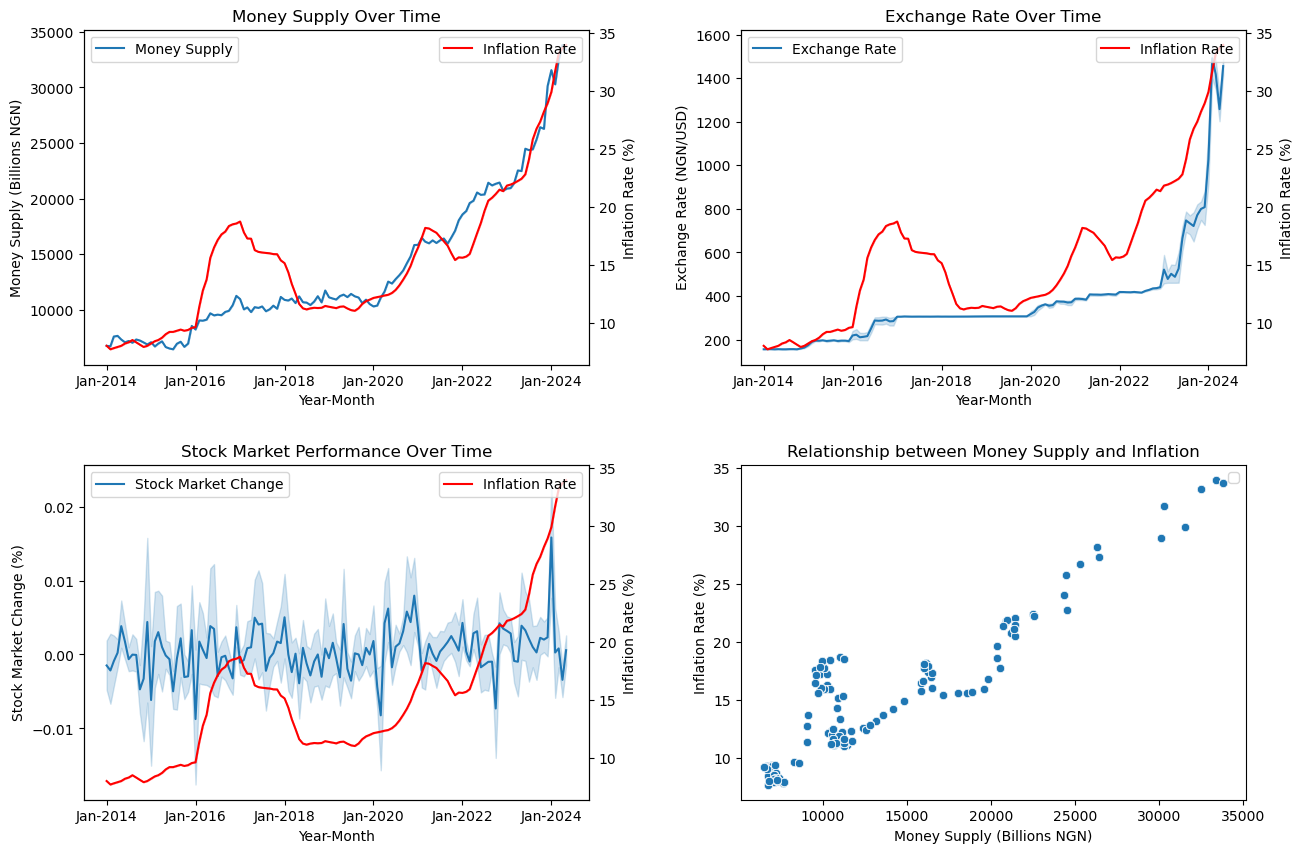

In [33]:
# Data Visualization
# Create a figure and axes for subplots with increased spacing
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

# Plot 1: Money Supply and Inflation
ax1 = sns.lineplot(x='Year-Month', y='Money Supply (Billions NGN)', data=combined_data, ax=axes[0, 0], label='Money Supply')
ax1.set_title('Money Supply Over Time')
ax1.set_ylabel('Money Supply (Billions NGN)')

ax2 = ax1.twinx()
sns.lineplot(x='Year-Month', y='Inflation Rate', data=combined_data, color='r', ax=ax2, label='Inflation Rate')
ax2.set_ylabel('Inflation Rate (%)')

# Add legend to the first plot
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Format the date ticks on x-axis
axes[0, 0].xaxis.set_major_formatter(DateFormatter('%b-%Y'))

# Plot 2: Exchange Rate and Inflation
ax3 = sns.lineplot(x='Year-Month', y='Exchange Rate (USD)', data=combined_data, ax=axes[0, 1], label='Exchange Rate')
ax3.set_title('Exchange Rate Over Time')
ax3.set_ylabel('Exchange Rate (NGN/USD)')

ax4 = ax3.twinx()
sns.lineplot(x='Year-Month', y='Inflation Rate', data=combined_data, color='r', ax=ax4, label='Inflation Rate')
ax4.set_ylabel('Inflation Rate (%)')

# Add legend to the second plot
ax3.legend(loc="upper left")
ax4.legend(loc="upper right")

axes[0, 1].xaxis.set_major_formatter(DateFormatter('%b-%Y'))

# Plot 3: Stock Market Change and Inflation
ax5 = sns.lineplot(x='Year-Month', y='Stock Market Change %', data=combined_data, ax=axes[1, 0], label='Stock Market Change')
ax5.set_title('Stock Market Performance Over Time')
ax5.set_ylabel('Stock Market Change (%)')

ax6 = ax5.twinx()
sns.lineplot(x='Year-Month', y='Inflation Rate', data=combined_data, color='r', ax=ax6, label='Inflation Rate')
ax6.set_ylabel('Inflation Rate (%)')

# Add legend to the third plot
ax5.legend(loc="upper left")
ax6.legend(loc="upper right")

axes[1, 0].xaxis.set_major_formatter(DateFormatter('%b-%Y'))

# Plot 4: Relationship between Money Supply and Inflation
ax7 = sns.scatterplot(x='Money Supply (Billions NGN)', y='Inflation Rate', data=combined_data, ax=axes[1, 1])
ax7.set_title('Relationship between Money Supply and Inflation')
ax7.set_xlabel('Money Supply (Billions NGN)')
ax7.set_ylabel('Inflation Rate (%)')

# Add legend to the fourth plot
ax7.legend(loc="upper right")

# Display the plots
plt.show()


In [36]:
# Perform a linear regression between Money Supply and Inflation
X = combined_data[['Money Supply (Billions NGN)']]
y = combined_data['Inflation Rate']
X = add_constant(X)
model = OLS(y, X).fit()

# Get the regression coefficient and p-value
regression_coefficient = model.params['Money Supply (Billions NGN)']
intercept = model.params['const']
p_value = model.pvalues['Money Supply (Billions NGN)']

# Annotate the regression line on the scatter plot
axes[1, 1].plot(X['Money Supply (Billions NGN)'], model.fittedvalues, color='blue')
axes[1, 1].annotate(f'y = {regression_coefficient:.2f}x + {intercept:.2f}\np-value = {p_value:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

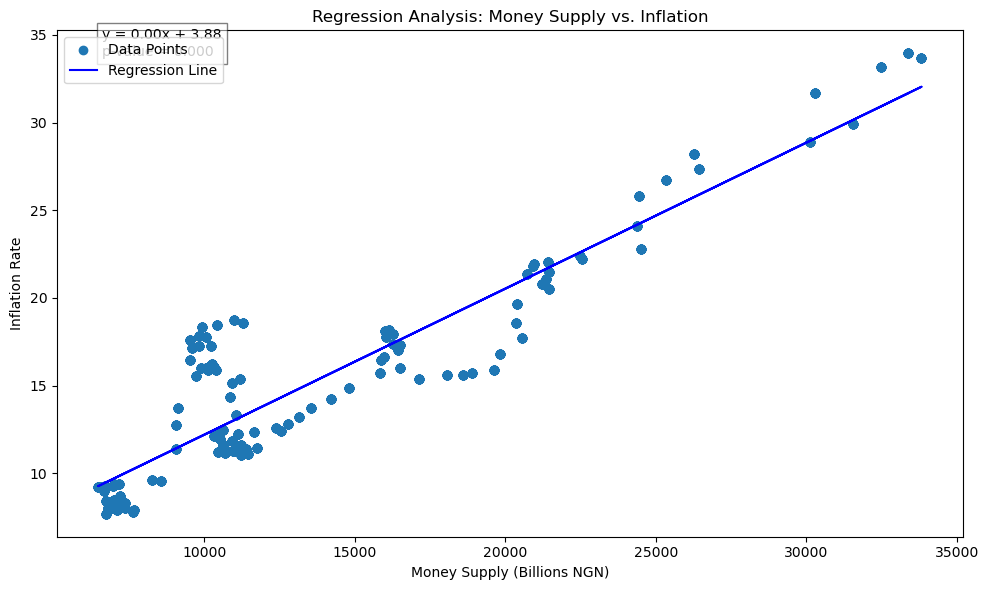

In [39]:
# Assuming combined_data is already defined and contains the necessary columns

# Perform a linear regression between Money Supply and Inflation
X = combined_data[['Money Supply (Billions NGN)']]
y = combined_data['Inflation Rate']
X = add_constant(X)
model = OLS(y, X).fit()

# Get the regression coefficient and p-value
regression_coefficient = model.params['Money Supply (Billions NGN)']
intercept = model.params['const']
p_value = model.pvalues['Money Supply (Billions NGN)']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of the data
ax.scatter(X['Money Supply (Billions NGN)'], y, label='Data Points')

# Plot the regression line
ax.plot(X['Money Supply (Billions NGN)'], model.fittedvalues, color='blue', label='Regression Line')

# Annotate the regression line
ax.annotate(f'y = {regression_coefficient:.2f}x + {intercept:.2f}\np-value = {p_value:.3f}', 
            xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.5))

# Add labels and title
ax.set_xlabel('Money Supply (Billions NGN)')
ax.set_ylabel('Inflation Rate')
ax.set_title('Regression Analysis: Money Supply vs. Inflation')
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [37]:
# Perform correlation analysis
correlation_matrix = combined_data[['Money Supply (Billions NGN)', 'Exchange Rate (USD)', 'Inflation Rate', 'Stock Market Change %']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             Money Supply (Billions NGN)  Exchange Rate (USD)  \
Money Supply (Billions NGN)                     1.000000             0.879588   
Exchange Rate (USD)                             0.879588             1.000000   
Inflation Rate                                  0.911780             0.861091   
Stock Market Change %                           0.082459             0.051878   

                             Inflation Rate  Stock Market Change %  
Money Supply (Billions NGN)        0.911780               0.082459  
Exchange Rate (USD)                0.861091               0.051878  
Inflation Rate                     1.000000               0.078917  
Stock Market Change %              0.078917               1.000000  


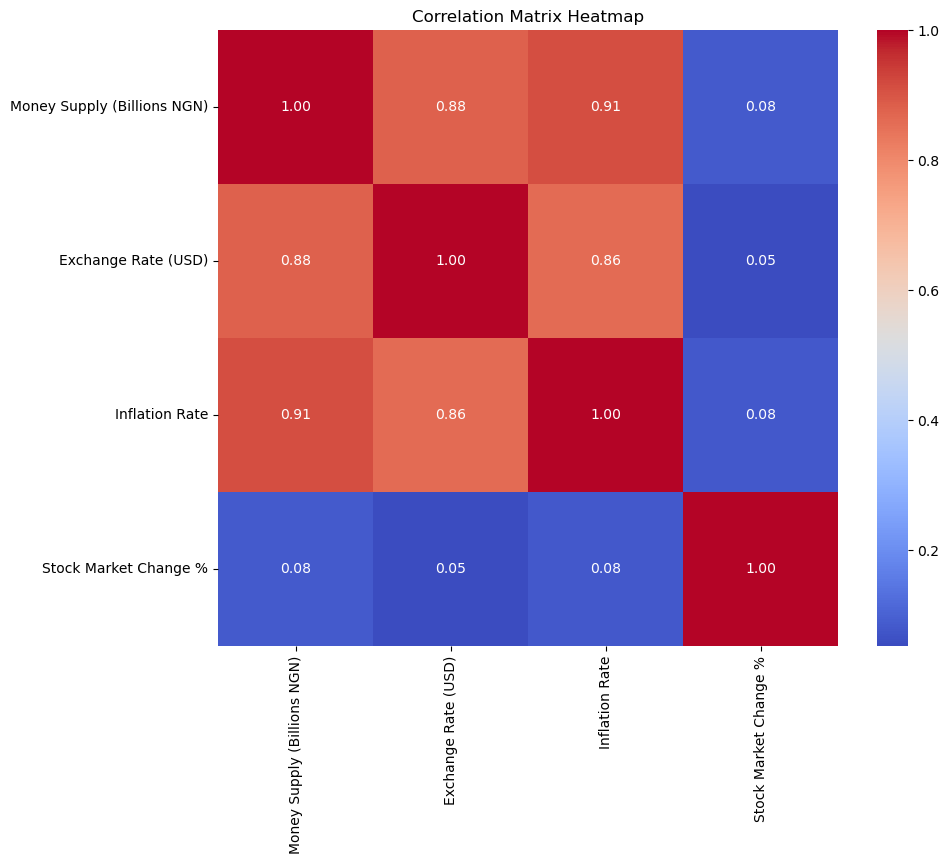

In [41]:
# Perform correlation analysis
correlation_matrix = combined_data[['Money Supply (Billions NGN)', 'Exchange Rate (USD)', 'Inflation Rate', 'Stock Market Change %']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


Based on the analysis done:

- **Exchange Rate and Inflation**: There is a positive correlation between the exchange rate (USD/NGN) and the inflation rate. As the exchange rate increases (Naira depreciates), inflation tends to rise. This suggests that a weaker Naira leads to higher import costs, driving up prices.
- **Money Supply and Inflation**: The analysis shows a positive relationship between money supply (M1) and inflation. An increase in money supply is associated with higher inflation rates, indicating that more money in circulation can lead to increased demand and higher prices.
- **Stock Market Performance and Inflation**: The stock market index shows a mixed relationship with inflation. While some periods indicate a positive correlation, others show a negative correlation. This suggests that other factors, such as investor sentiment and economic policies, also play significant roles.
- **Money Supply and Stock Market**: There is a positive correlation between money supply and stock market performance. Increased money supply can lead to higher liquidity in the market, boosting stock prices.

These correlations highlight the interconnectedness of monetary policy, exchange rates, and economic performance. Understanding these relationships can help in making informed financial and investment decisions.

### Theoretical Framework

1. Increased Money Supply
Definition: The total amount of monetary assets available in an economy at a specific time.
Mechanism: Central banks increase the money supply through various means such as lowering interest rates, purchasing government securities, or direct lending to financial institutions.

2. Currency Depreciation
Definition: A decrease in the value of a country’s currency relative to other currencies.
Mechanism: An increased money supply leads to more currency in circulation, reducing its value due to higher supply. This depreciation makes imports more expensive and exports cheaper, affecting the trade balance.

3. Stock Market Appreciation
Definition: An increase in the value of stock market indices.
Mechanism: With more money in circulation, investors have more capital to invest in stocks. Lower interest rates also make bonds less attractive, driving more investment into the stock market, leading to higher stock prices.

4. Increased Inflation
Definition: A general increase in prices and fall in the purchasing value of money.
Mechanism: More money in the economy increases demand for goods and services. If productivity remains constant, this higher demand leads to higher prices, resulting in inflation.

### Interrelationships

**_Money Supply and Currency Depreciation_**: Increased money supply → Higher currency supply → Lower currency value.

**_Money Supply and Stock Market_**: Increased money supply → More investment capital → Higher stock prices.

**_Money Supply and Inflation_**: Increased money supply → Higher demand for goods/services → Higher prices (inflation).

### Productivity model 

Currency Depreciation: Represented by the exchange rate data.

Stock Market Appreciation: Represented by the stock market index data.

Increased Inflation: Represented by the inflation rate data.

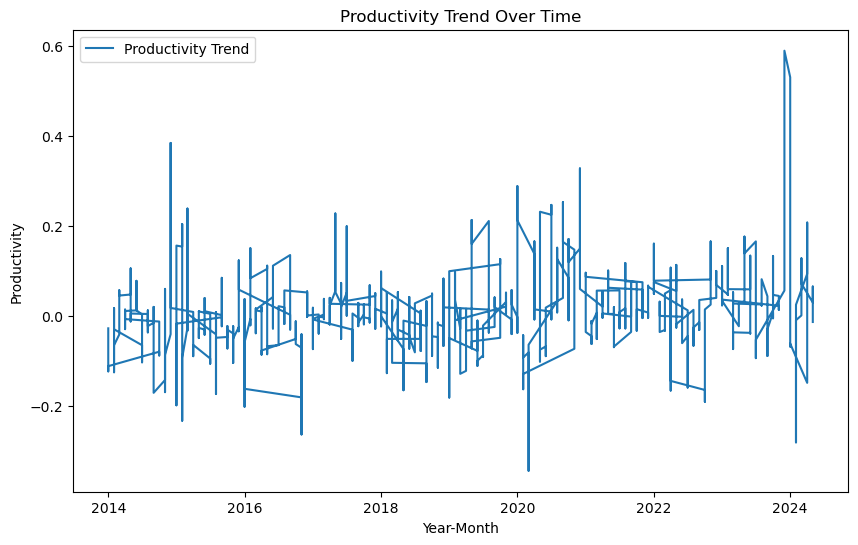

In [35]:
# Calculate productivity as a function of the three variables
combined_data['Productivity'] = (combined_data['Exchange Rate (USD)'] * combined_data['Stock Market Change %']) / combined_data['Inflation Rate']

# Analyze productivity trend
productivity_trend = combined_data['Productivity'].rolling(window=12).mean()  # 12-month rolling average for trend analysis

# Plot the productivity trend
plt.figure(figsize=(10, 6))
plt.plot(combined_data['Year-Month'], productivity_trend, label='Productivity Trend')
plt.xlabel('Year-Month')
plt.ylabel('Productivity')
plt.title('Productivity Trend Over Time')
plt.legend()
plt.show()


### Analysis

Based on the chart above titled - “Productivity Trend Over Time,” the productivity appears to be relatively flat with some fluctuations over the years. There are peaks and troughs, but no clear long-term increasing or decreasing trend. However, there is a notable spike at the far right end of the graph, indicating a sharp increase in productivity around 2024.

### Productivity Baseline

To determine an appropriate formula for calculating the productivity baseline, the following approach will suffice based on the data and analysis:


#### Identify Key Variables:

Money Supply (M1): Represents the total amount of money in circulation.

Inflation Rate: Measures the rate at which the general level of prices for goods and services is rising.

Exchange Rate (USD): The value of the Nigerian Naira against the US Dollar.

Stock Market Change (%): Indicates the performance of the stock market.



_**Establish Relationships**_:

Productivity Baseline: Can be inferred from the relationship between money supply, inflation, and exchange rate.



**Formula**:

Productivity Baseline (PB) can be calculated as: 

PB = Money Supply (M1)/ Inflation Rate × Exchange Rate (USD)



This formula assumes that an increase in productivity will lead to a higher money supply, lower inflation, and a stronger exchange rate.